In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!cd ../; make owid_data_hash

{ \
		cd owid-datasets/ ;\
		git rev-parse HEAD ;\
	}
48b047dc5bc19dbb1b56287f309cac8494d552bb


In [16]:
df = pd.read_csv("../owid-datasets/datasets/Terrorist attacks by weapon type - Global Terrorism Database (2018)/Terrorist attacks by weapon type - Global Terrorism Database (2018).csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              4373 non-null   object
 1   Year                4373 non-null   int64 
 2   Biological          4373 non-null   int64 
 3   Chemical            4373 non-null   int64 
 4   Explosives          4373 non-null   int64 
 5   Fake Weapons        4373 non-null   int64 
 6   Firearms            4373 non-null   int64 
 7   Incendiary          4373 non-null   int64 
 8   Melee               4373 non-null   int64 
 9   Other               4373 non-null   int64 
 10  Radiological        4373 non-null   int64 
 11  Sabotage Equipment  4373 non-null   int64 
 12  Unknown             4373 non-null   int64 
 13  Vehicle             4373 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 478.4+ KB


In [18]:
df.head()

,Entity,Year,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,Vehicle
0,Afghanistan,1973,0,0,0,0,0,0,0,0,0,0,1,0
1,Afghanistan,1979,0,0,1,0,1,0,0,0,0,0,1,0
2,Afghanistan,1987,0,1,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,1988,0,0,11,0,0,0,0,0,0,0,0,0
4,Afghanistan,1989,0,1,9,0,0,0,0,0,0,0,0,0


In [19]:
def type_by_country(weapon, country):
    filter_df = df[df['Entity'] == country]
    sns.lineplot(x='Year', y=weapon, data=filter_df)

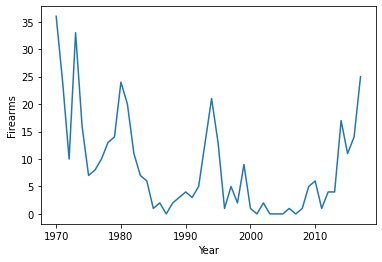

In [20]:
type_by_country('Firearms', 'United States')

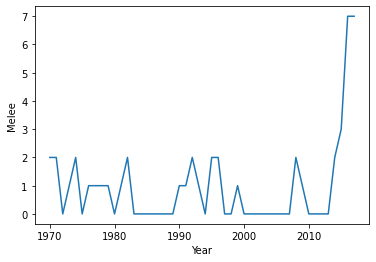

In [21]:
type_by_country('Melee', 'United States')

In [22]:
def weapon_count(country):
    filter_df = df[df['Entity'] == country]
    sum_df = filter_df.sum()
    sum_df.drop(labels=['Entity', 'Year'], inplace=True)
    sum_df = sum_df.sort_values()
    
    plt.figure(figsize=(12,10))
    plt.barh(sum_df.keys(), sum_df.values, align='center')
    plt.title(country)
    plt.xticks(rotation=45)
    plt.ylabel('Weapon')
    plt.xlabel("Count ({} - {})".format(filter_df['Year'].min(), filter_df['Year'].max()))

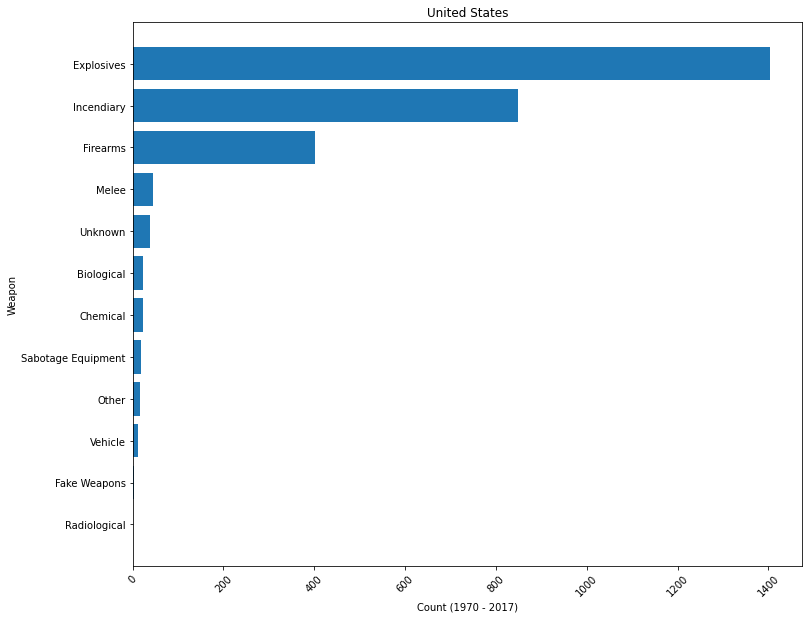

In [23]:
weapon_count('United States')

In [11]:
# country with most incident by weapon type and year
years = df['Year'].unique().tolist()
columns = df.columns.to_list()[1:] # skip entity col

result_df = pd.DataFrame(columns=columns)
filter_df = df[df['Entity'] != 'World']

for year in years:
    row = [year]
    df_year = filter_df[filter_df['Year'] == year]
    
    for weapon in columns[1:]: # skip year col
        entity = df_year.iloc[df_year[weapon].argmax()]['Entity']
        row.append(entity)
        
    row_df = pd.DataFrame([row], columns=columns)
    result_df = result_df.append(row_df, ignore_index=True)

result_df = result_df.sort_values(by=['Year'])

In [12]:
result_df

,Year,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,Vehicle
43,1970,Argentina,North America,North America,Argentina,North America,North America,North America,Argentina,Argentina,North America,South America,Pakistan
44,1971,Argentina,North America,North America,Argentina,Western Europe,North America,North America,Argentina,Argentina,Argentina,South America,Argentina
33,1972,Algeria,Algeria,Western Europe,North America,Western Europe,North America,United Kingdom,Algeria,Algeria,Algeria,Western Europe,Algeria
0,1973,Afghanistan,Western Europe,Western Europe,Afghanistan,Western Europe,Western Europe,Western Europe,Afghanistan,Afghanistan,Afghanistan,South America,Afghanistan
36,1974,Andorra,North America,Western Europe,North America,Western Europe,Western Europe,United Kingdom,Andorra,Austria,Andorra,South America,Andorra
45,1975,Argentina,West Germany (FRG),Western Europe,Argentina,Western Europe,Western Europe,Western Europe,Argentina,Argentina,Argentina,Western Europe,Argentina
34,1976,Algeria,North America,Western Europe,Algeria,Western Europe,Western Europe,United Kingdom,Greece,Algeria,Algeria,Western Europe,Algeria
37,1977,Angola,Middle East & North Africa,Western Europe,Angola,Western Europe,Western Europe,Western Europe,Angola,Angola,Angola,South America,Angola
35,1978,Algeria,Western Europe,Western Europe,Algeria,Western Europe,Western Europe,East Asia,Algeria,Algeria,Chile,South America,Algeria
1,1979,Afghanistan,Western Europe,Western Europe,Middle East & North Africa,Western Europe,Western Europe,Western Europe,Colombia,France,East Asia,Central America & Caribbean,East Asia


<AxesSubplot:>

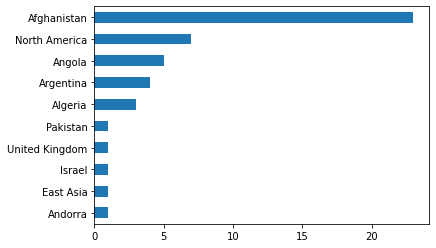

In [13]:
result_df['Biological'].value_counts().sort_values(ascending=True).plot(kind='barh')

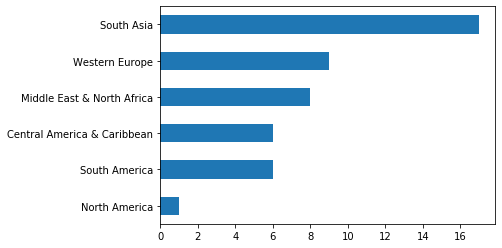

In [155]:
result_df['Firearms'].value_counts().sort_values(ascending=True).plot(kind='barh')